# From data to network 2

## Packages

In [ ]:
# Example of calculating Euclidean distance
from math import sqrt
import networkx as nx
import pandas as pd
import numpy as np

## Useful aplications

In [ ]:
# calculate the Euclidean distance between two vectors
def euclidean_distance(row1, row2):
	distance = 0.0
	for i in range(len(row1)-1):
		distance += (row1[i] - row2[i])**2
	return sqrt(distance)

## Data

In [ ]:
# Test distance function
df = pd.read_csv('iris.csv')
dataset=df[['sepal.length','sepal.width','petal.length', 'petal.width']].values.tolist()
clases=df['variety'].values
print(clases)
print(dataset)

['Setosa' 'Setosa' 'Setosa' 'Setosa' 'Setosa' 'Setosa' 'Setosa' 'Setosa'
 'Setosa' 'Setosa' 'Setosa' 'Setosa' 'Setosa' 'Setosa' 'Setosa' 'Setosa'
 'Setosa' 'Setosa' 'Setosa' 'Setosa' 'Setosa' 'Setosa' 'Setosa' 'Setosa'
 'Setosa' 'Setosa' 'Setosa' 'Setosa' 'Setosa' 'Setosa' 'Setosa' 'Setosa'
 'Setosa' 'Setosa' 'Setosa' 'Setosa' 'Setosa' 'Setosa' 'Setosa' 'Setosa'
 'Setosa' 'Setosa' 'Setosa' 'Setosa' 'Setosa' 'Setosa' 'Setosa' 'Setosa'
 'Setosa' 'Setosa' 'Versicolor' 'Versicolor' 'Versicolor' 'Versicolor'
 'Versicolor' 'Versicolor' 'Versicolor' 'Versicolor' 'Versicolor'
 'Versicolor' 'Versicolor' 'Versicolor' 'Versicolor' 'Versicolor'
 'Versicolor' 'Versicolor' 'Versicolor' 'Versicolor' 'Versicolor'
 'Versicolor' 'Versicolor' 'Versicolor' 'Versicolor' 'Versicolor'
 'Versicolor' 'Versicolor' 'Versicolor' 'Versicolor' 'Versicolor'
 'Versicolor' 'Versicolor' 'Versicolor' 'Versicolor' 'Versicolor'
 'Versicolor' 'Versicolor' 'Versicolor' 'Versicolor' 'Versicolor'
 'Versicolor' 'Versicolor' 'V

## Model

### K-NN

In [ ]:
# Locate the most similar neighbors
def KNN(train, test_row, num_neighbors):
	distances = list()
	for train_row in train:
		dist = euclidean_distance(test_row, train_row)
		distances.append((train_row, dist))
	distances.sort(key=lambda tup: tup[1])
	neighbors = list()
	for i in range(num_neighbors):
		neighbors.append(distances[i][0])
	return neighbors


In [ ]:
neighbors = KNN(dataset, dataset[6], 3)
for neighbor in neighbors:
	print(neighbor)

[4.6, 3.4, 1.4, 0.3]
[4.6, 3.2, 1.4, 0.2]
[4.7, 3.2, 1.3, 0.2]


### E-radious

In [ ]:
# Locate the most similar neighbors
def eradious(train, test_row,radious):
	distances = list()
	for train_row in train:
		dist = euclidean_distance(test_row, train_row)
		distances.append((train_row, dist))
	distances.sort(key=lambda tup: tup[1])
	neighbors = list()
	for i in range(len(distances)):
		if distances[i][1]<radious: neighbors.append(distances[i][0])
	return neighbors

In [ ]:
neighbors = eradious(dataset, dataset[7],0.2)

In [ ]:
for neighbor in neighbors:
	print(neighbor)

[5.0, 3.4, 1.5, 0.2]
[5.1, 3.4, 1.5, 0.2]
[5.0, 3.4, 1.6, 0.4]
[5.0, 3.5, 1.6, 0.6]
[5.0, 3.3, 1.4, 0.2]
[5.1, 3.5, 1.4, 0.2]
[5.1, 3.5, 1.4, 0.3]


### Model with eradious and knn

In [ ]:
def modelo_final(train, test_row,radious,num_neighbors):
  neighbors = eradious(dataset, test_row,radious)
  if len(neighbors)<num_neighbors:
    neighbors = KNN(dataset, test_row,num_neighbors)
  return neighbors

In [ ]:
neighbors = modelo_final(dataset, dataset[7],0.2,3)
for neighbor in neighbors:
	print(neighbor)

[5.0, 3.4, 1.5, 0.2]
[5.1, 3.4, 1.5, 0.2]
[5.0, 3.4, 1.6, 0.4]
[5.0, 3.5, 1.6, 0.6]
[5.0, 3.3, 1.4, 0.2]
[5.1, 3.5, 1.4, 0.2]
[5.1, 3.5, 1.4, 0.3]


## Creation of the network


In [ ]:
i=0
graph=list()
for datavector in dataset:
  neighbors=modelo_final(dataset, datavector,0.9,15)
  nei=list()
  for neighbor in neighbors:
    a=dataset.index(neighbor)
    nei.append([i,a])
  i=i+1
  graph=graph+nei
print(graph)

[[0, 0], [0, 17], [0, 40], [0, 4], [0, 39], [0, 27], [0, 28], [0, 7], [0, 37], [0, 43], [0, 49], [0, 21], [0, 26], [0, 48], [0, 19], [0, 31], [0, 46], [0, 23], [0, 35], [0, 11], [0, 10], [0, 36], [0, 20], [0, 9], [0, 34], [0, 2], [0, 6], [0, 16], [0, 29], [0, 1], [0, 30], [0, 25], [0, 12], [0, 44], [0, 45], [0, 47], [0, 5], [0, 24], [0, 32], [0, 3], [0, 22], [0, 18], [0, 42], [0, 33], [0, 38], [0, 14], [1, 1], [1, 12], [1, 45], [1, 9], [1, 34], [1, 25], [1, 30], [1, 35], [1, 2], [1, 49], [1, 3], [1, 29], [1, 47], [1, 7], [1, 39], [1, 26], [1, 11], [1, 23], [1, 28], [1, 6], [1, 38], [1, 8], [1, 40], [1, 0], [1, 17], [1, 42], [1, 43], [1, 27], [1, 37], [1, 4], [1, 31], [1, 24], [1, 13], [1, 20], [1, 21], [1, 22], [1, 36], [1, 48], [1, 41], [1, 19], [1, 46], [1, 10], [2, 2], [2, 47], [2, 6], [2, 12], [2, 45], [2, 3], [2, 42], [2, 29], [2, 9], [2, 34], [2, 1], [2, 35], [2, 49], [2, 30], [2, 38], [2, 11], [2, 7], [2, 40], [2, 8], [2, 37], [2, 26], [2, 25], [2, 39], [2, 13], [2, 0], [2, 17],

In [ ]:
G = nx.Graph()
for g in graph:
  G.add_edge(g[0], g[1])

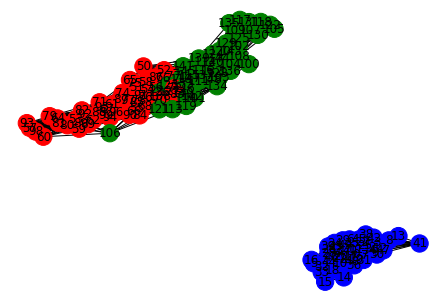

In [ ]:
color_map = []
for node in G:
    if clases[node]=='Setosa':
        color_map.append('blue')
    elif clases[node]=='Versicolor':
        color_map.append('red')
    else: 
        color_map.append('green')      
nx.draw(G, node_color=color_map, with_labels=True)